# Big Data Project : Etape 3

In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
#import datetime
import matplotlib.dates as mdates
import pandas as pd
import csv
#import seaborn as sns

### Importation des fichiers

In [2]:
test = pd.read_csv('test.csv',names = ['Transaction', 'Montant', 'compteS','Solde source avant', 'Solde source après', 'compteD','Solde dest avant', 'Solde dest après', 'fraude'])
print( "Aperçu des données (Test):")
print(test[:10])

train = pd.read_csv('train.csv',names = ['Transaction', 'Montant', 'compteS','Solde source avant', 'Solde source après', 'compteD','Solde dest avant', 'Solde dest après', 'fraude'])

# Regroupement des deux fichiers en un seul pour la normalisation
data=pd.concat([train,test])
print(test.shape)
print(train.shape)
print(data.shape)

Aperçu des données (Test):
  Transaction     Montant      compteS  Solde source avant  \
0     PAYMENT     5634.43  C2117219900           267629.54   
1    TRANSFER  1158070.88   C278936084          1158070.88   
2    CASH_OUT    67128.33   C489879149            67128.33   
3    CASH_OUT   495002.26  C1881438255            25008.00   
4    TRANSFER   615954.92   C114731289           615954.92   
5    CASH_OUT  8994286.69   C180006321          8994286.69   
6    CASH_OUT   623152.72  C2031063966           623152.72   
7     PAYMENT    17206.91   C507644739            90836.00   
8     PAYMENT    20099.71  C1048703966            77758.49   
9    CASH_OUT   220799.50  C1652855106                0.00   

   Solde source après      compteD  Solde dest avant  Solde dest après  fraude  
0           261995.11   M292083996              0.00              0.00       0  
1                0.00  C1115591594              0.00              0.00       1  
2                0.00   C813701633         6238

#### LabelEncoder (transformation des strings en numérique)

In [3]:
# TEST
test['lettreS']=test.compteS.str.get(0)
test['numS']=test.compteS.str[1:]
test['lettreD']=test.compteD.str.get(0)
test['numD']=test.compteD.str[1:]
from sklearn import preprocessing
for column in test.columns:
    if test[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        test[column] = le.fit_transform(test[column])
        
test[:10]


# TRAIN
train['lettreS']=train.compteS.str.get(0)
train['numS']=train.compteS.str[1:]
train['lettreD']=train.compteD.str.get(0)
train['numD']=train.compteD.str[1:]
for column in train.columns:
    if train[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        train[column] = le.fit_transform(train[column])
        
# DATA 
for column in data.columns:
    if data[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        data[column] = le.fit_transform(data[column])


#### Création des datasets train et test avec leurs labels

In [4]:
X_train=train[['Transaction', 'Montant','Solde source avant', 'Solde source après', 'Solde dest avant', 'Solde dest après','lettreS','numS','lettreD','numD']]
y_train=train.fraude

X_test=test[['Transaction', 'Montant','Solde source avant', 'Solde source après', 'Solde dest avant', 'Solde dest après', 'lettreS','numS','lettreD','numD']]
y_test=test.fraude

### Visualisation des données 

Nombre de fraudes dans le fichier train

0    1997419
1       2581
Name: fraude, dtype: int64


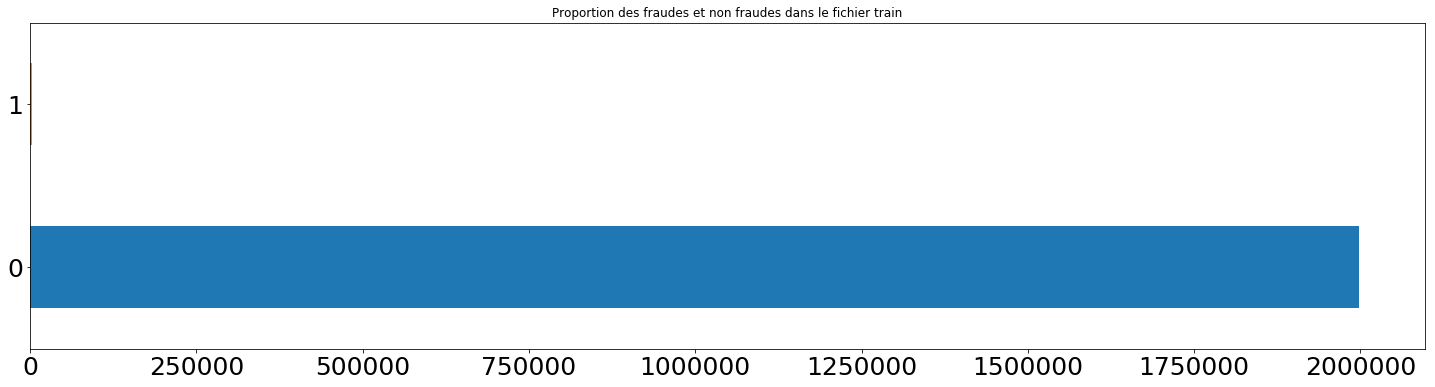

In [9]:
fraudes=train.fraude

counts=fraudes.value_counts()
print(counts)

counts[:10].plot(kind='barh', figsize=(25,6), fontsize=25)
plt.title("Proportion des fraudes et non fraudes dans le fichier train")
plt.show()


Nombre de fraudes dans le fichier test

0    4003
1    3997
Name: fraude, dtype: int64


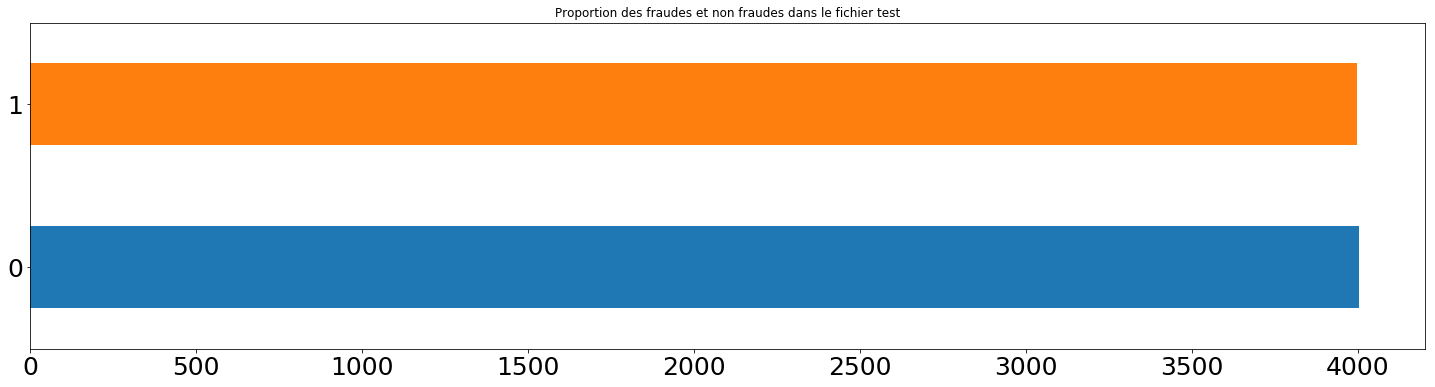

In [10]:
fraudes=test.fraude

counts=fraudes.value_counts()
print(counts)

counts[:10].plot(kind='barh', figsize=(25,6), fontsize=25)
plt.title("Proportion des fraudes et non fraudes dans le fichier test")
plt.show()


### Preprocessing

#### Normalisation

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler_standard = StandardScaler()
scaler_standard.fit(data)

X_scaled = scaler_standard.transform(data)
#X_test_scaled_standard  = scaler_standard.transform(X_test)


#### PCA (réduction des dimensions)

In [7]:
from sklearn.decomposition import PCA

Dimension 2 : data

In [25]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Shape before PCA:", X_scaled.shape)
print("Shape after PCA:", X_pca.shape)

Shape before PCA: (2008000, 9)
Shape after PCA: (2008000, 2)


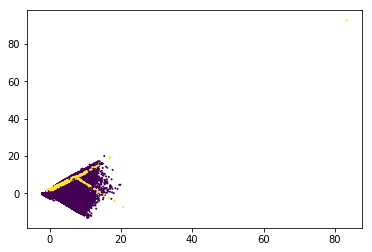

In [45]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=data.fraude, marker='o',s=1)
plt.show()

plt.figure(figsize=(8,6), dpi=80)
plt.subplot(1,1,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=data.fraude, marker='o',s=1)
plt.xlim(0, 20)
plt.show()

Dimension 3 : data

In [8]:
pca_3d = PCA(n_components=3)
pca_3d.fit(X_scaled)
X_pca_3d = pca_3d.transform(X_scaled)
print("Shape before PCA:", X_scaled.shape)
print("Shape after PCA:", X_pca_3d.shape)

Shape before PCA: (2008000, 9)
Shape after PCA: (2008000, 3)


Now we can visualize it in 3D.

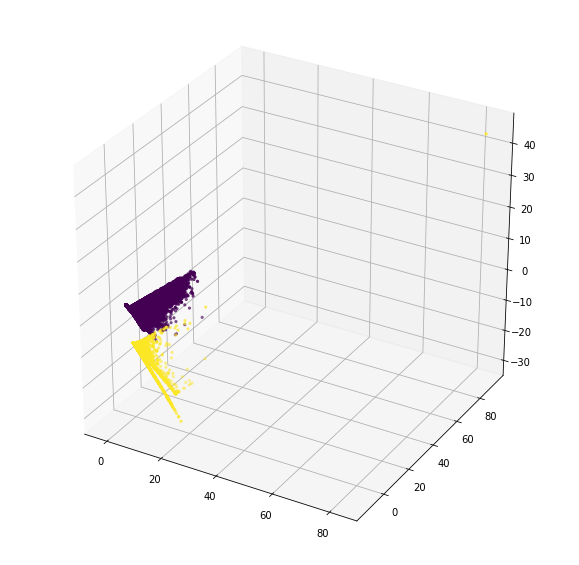

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2],
           c=data.fraude, s=5)
plt.show()

#### Visualisation de l’influence des paramètres

In [ ]:
#correlation entre les différents paramètres 
corrMatt = data[['Transaction', 'Montant','Solde source avant', 'Solde source après', 'Solde dest avant', 'Solde dest après','fraude']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

##### Influence des types de transaction

In [ ]:
ax=sns.stripplot(x="Transaction", y="fraude", data=data, jitter=True)
#ax.set_xticklabels(['printemps', 'été', 'automne', 'hiver'], rotation=30)
plt.show()
#On remarque que les fraudes sont présentes seulement lors de deux types de transaction : transfer et cash_out. 

##### Influence du montant

In [ ]:
ax=sns.stripplot(x="Montant", y="fraude", data=data, jitter=True)
#ax.set_xticklabels(['printemps', 'été', 'automne', 'hiver'], rotation=30)
plt.show()

In [ ]:
plt.hist(x="Transaction",data=datap,edgecolor="black",linewidth=2)

sommef=(data.fraude==1).sum()
print(sommef)

#### Oversampling

In [ ]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X_train)

# Apply regular SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X_train, y_train)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
X_res_vis.append(pca.transform(X_res))

### Apprentissage/Algorithme choisi

#### Arbre de décision

In [6]:
%run plot_interactive_tree.py
plot_tree_progressive()

In [7]:
# create and train a decision tree

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [8]:
training_accuracy = tree.score(X_train,y_train)
test_accuracy = tree.score(X_test,y_test)
print("Training accuracy:", training_accuracy)
print("Test accuracy:", test_accuracy)

Training accuracy: 1.0
Test accuracy: 0.920625


Modification de paramètres pour améliorer ses performances et temps de calcul

In [15]:
start = time.time()
tree = DecisionTreeClassifier(max_depth=33)
tree.fit(X_train, y_train)
end = time.time()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=33,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Performances de l'arbre de décision


In [16]:
training_accuracy = tree.score(X_train,y_train)
test_accuracy = tree.score(X_test,y_test)
print("Training accuracy:", training_accuracy)
print("Test accuracy:", test_accuracy)

Training accuracy: 0.9999985
Test accuracy: 0.918125


In [24]:
# Rappel, précision et f-score 
predict=tree.predict(X_test)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predict, average='weighted')

(0.92935093283582093, 0.91812499999999997, 0.91758088333015508, None)

In [ ]:
# Temps de calcul 
print("Temps de calcul arbre:",end-start)

In [12]:
# now we can save the DecisionTreeClassifier model as
# a tree image.
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", 
                class_names=["non fraude", "fraude"],
                impurity=False,
                filled=True)

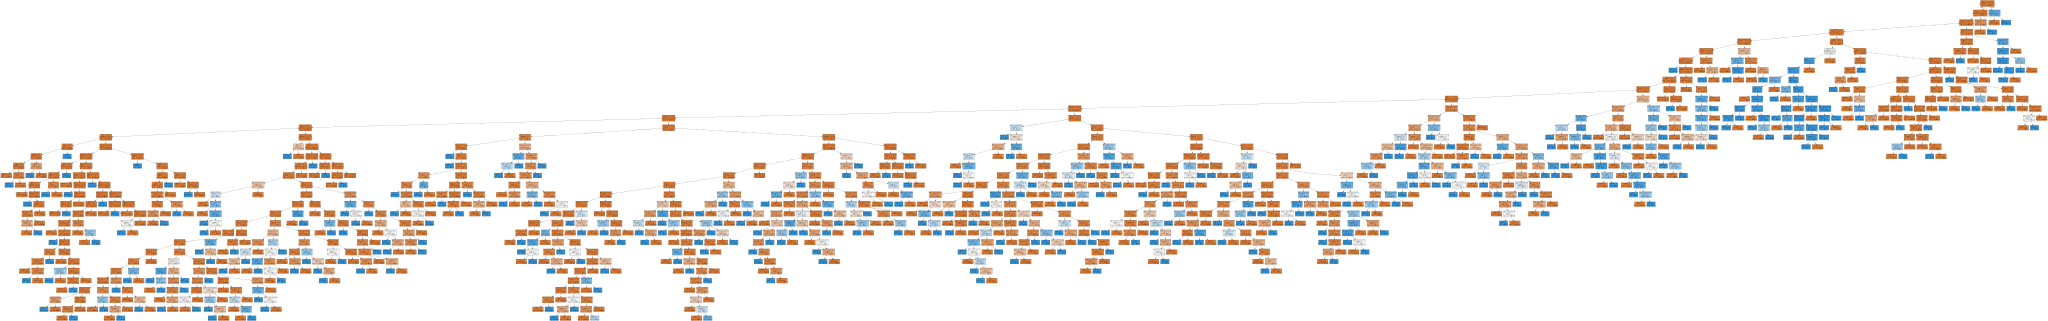

In [13]:
# we can visualize this .dot image with graphviz
import graphviz
with open("tree.dot") as f:
    breast_tree = f.read()
graphviz.Source(breast_tree)

##### Prédiction sur le fichier test (visualisation)

In [ ]:
predict=tree.predict(X_test)
print(predict[:10])
print(test.fraude[:10])
#print(test.fraude[:10])

In [14]:
test.fraude[:10]

0    0
1    1
2    1
3    0
4    1
5    1
6    1
7    0
8    0
9    0
Name: fraude, dtype: int64

### Prédiction des données predict.csv

In [2]:
# importation du fichier predict
predict = pd.read_csv('predict.csv',names = ['Transaction', 'Montant', 'compteS','Solde source avant', 'Solde source après', 'compteD','Solde dest avant', 'Solde dest après'])

In [ ]:
# pré traitement  labelencoder
for column in predict.columns:
    if predict[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        predict[column] = le.fit_transform(predict[column])


In [ ]:
# prédiction sous la forme de la colonne fraude
fraude_colonne = tree.predict(predict)
fraude_colonne_df= pd.DataFrame(fraude_colonne, columns=['fraude'])
print(fraude_colonne_df[:10])
predict['fraude']=fraude_colonne_df

In [ ]:
# création du fichier result.csv
predict.to_csv('result_neural.csv', sep=',', encoding='utf-8', header=False, index=False)

### Autres algorithmes testés

#### K-means

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model = KNeighborsClassifier(n_neighbors=3)
end = time.time()
# training
model.fit(X_train, y_train)

#### Performances de K-means

In [ ]:
# evaluation
training_accuracy = model.score(X_train,y_train)
test_accuracy = model.score(X_test,y_test)
print("Training accuracy:", training_accuracy)
print("Test accuracy:", test_accuracy)

In [1]:
# Rappel, précision et f-score 
predict=model.predict(X_test)
precision_recall_fscore_support(y_test, predict, average='weighted')

NameError: name 'precision_recall_fscore_support' is not defined

In [ ]:
# Temps de calcul 
print("Temps de calcul k-means:",end-start)

#### Réseau de neurones

In [ ]:
import time
from sklearn.neural_network import MLPClassifier
start = time.time()
neur = MLPClassifier(hidden_layer_sizes=(10,20,20,10),activation="identity", max_iter=5000, random_state=0)
neur.fit(X_train, y_train)
end = time.time()

#### Performances du réseau de neurones

In [ ]:
# Rappel, précision et f-score 
predict=tree.predict(X_test)
print(precision_recall_fscore_support(y_test, predict, average='weighted'))

In [ ]:
# Temps de calcul 
print("Temps de calcul RdN:",end-start)